# Brazilian E-Commerce Public Dataset

## Some customers didn't write a review. But why are they happy or mad?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import pandas_profiling 
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # train, test split
from sklearn.preprocessing import StandardScaler # normalization
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.svm import SVC # SVC model
from xgboost import XGBClassifier # XGBoost model
from sklearn.model_selection import GridSearchCV, cross_val_score # Gridsearch 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve# results
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer



In [2]:
customers_df= pd.read_csv('olist_customers_dataset.csv')
geolocation_df= pd.read_csv("olist_geolocation_dataset.csv")
items_df= pd.read_csv('olist_order_items_dataset.csv')
payments_df= pd.read_csv('olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('olist_orders_dataset.csv')
products_df= pd.read_csv('olist_products_dataset.csv')
sellers_df= pd.read_csv('olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('product_category_name_translation.csv')


## 01 - Overview from data

### Items DF
freight_value = valor do frete

shipping_limit_date = data_limite_de_envio

price = preço

seller_id = ID do vendedor

product_id = ID do produto

order_item_id = ID do item do pedido

order_id = ID do pedido

### Payments DF
payment_value = valor do pagamento

payment_type = tipo de pagamento

payment_installments = Parcelas de pagamento

paymente_value = Valor de pagamento

### Reviews DF

review_score = Pontuação review

review_comment_title = Titulo de comentario da revisão (Recomendo, não recomendo...)

review_comment_message = Mensagem de revisão

review_answer_timestamp = Horário da resposta da revisão



In [3]:
customers_df.head(5).style.background_gradient()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df.head(5).style.background_gradient()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
items_df.head(5).style.background_gradient()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900000,13.290000
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900000,19.930000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000000,17.870000
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990000,12.790000
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900000,18.140000


In [6]:
payments_df.head(5).style.background_gradient()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.330000
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.390000
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.710000
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.780000
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.450000


In [7]:
reviews_df.head(5).style.background_gradient()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,nan,nan,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,nan,nan,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,nan,nan,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,nan,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,nan,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df.head(5).style.background_gradient()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products_df.head(5).style.background_gradient()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.000000,287.000000,1.000000,225.000000,16.000000,10.000000,14.000000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.000000,276.000000,1.000000,1000.000000,30.000000,18.000000,20.000000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.000000,250.000000,1.000000,154.000000,18.000000,9.000000,15.000000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.000000,261.000000,1.000000,371.000000,26.000000,4.000000,26.000000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.000000,402.000000,4.000000,625.000000,20.000000,17.000000,13.000000


In [10]:
sellers_df.head(5).style.background_gradient()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
category_translation_df.head(5).style.background_gradient()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Olhando para os valores nulos

In [12]:
datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')


,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


Dropando valores Nan e duplicados

In [13]:

for i in datasets:
    i.dropna(inplace=True)


In [14]:
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [15]:

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')



,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",9839,7,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",96461,8,0,0,
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [16]:
for i in datasets:
    i.info()
    print("*"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   ge


Merging All Dataframes

In [17]:
import pandas as pd

merged_df = pd.merge(customers_df, orders_df, on="customer_id")
merged_df = merged_df.merge(reviews_df, on="order_id")
merged_df = merged_df.merge(items_df, on="order_id")
merged_df = merged_df.merge(products_df, on="product_id")
merged_df = merged_df.merge(payments_df, on="order_id")
merged_df = merged_df.merge(sellers_df, on='seller_id')
merged_df = merged_df.merge(category_translation_df, on='product_category_name')

# Agora, para verificar a forma do DataFrame, você deve acessar o atributo 'shape' sem parênteses
print(merged_df.shape)


(11578, 40)


In [18]:
merged_df.head(5).style.background_gradient()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.000000,22.250000,casa_conforto,61.000000,407.000000,1.000000,5200.000000,45.000000,15.000000,35.000000,1,credit_card,8,252.250000,14940,ibitinga,SP,home_confort
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,2018-08-01 15:03:08,2018-08-09 00:00:00,b1baef9d80d6b337ca8563d2f9f65476,2,Nota 6,Não gostei do produto não recomendo a loja.,2018-08-02 00:00:00,2018-08-03 23:24:42,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-20 17:35:14,230.000000,48.660000,casa_conforto,61.000000,407.000000,1.000000,5200.000000,45.000000,15.000000,35.000000,1,credit_card,10,278.660000,14940,ibitinga,SP,home_confort
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,2018-06-03 18:39:37,2018-06-07 00:00:00,d7b8a6b7f6b8bff63a3983f1d4175ee1,5,OTIMO,"COMPREI PELA PRIMEIRA VEZ E TUDO VEIO EM PERFEITA ORDEM E DENTRO DO PRAZO, ATÉ CHEGOU BEM ANTECIPADO APESAR DA GREVE DE CAMINHONEIROS.",2018-06-04 00:00:00,2018-06-08 11:39:49,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,2018-05-25 12:56:01,86.900000,8.670000,casa_conforto,56.000000,176.000000,1.000000,1825.000000,53.000000,10.000000,40.000000,1,credit_card,8,95.570000,14940,ibitinga,SP,home_confort
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,2018-06-16 22:42:12,2018-07-11 00:00:00,cbc036cc8c3edc20daf02f781a5f7a39,5,Super Índico,10,2018-06-17 00:00:00,2018-06-18 12:04:19,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,2018-06-13 12:30:21,84.000000,14.680000,casa_conforto,56.000000,176.000000,1.000000,1825.000000,53.000000,10.000000,40.000000,1,credit_card,2,98.680000,14940,ibitinga,SP,home_confort
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,2018-08-20 18:36:41,2018-09-03 00:00:00,9e96e374304db42a8aecd4a97d53cc1b,5,Super recomendado,Estou plenamente satisfeita com minha aquisição. E recomendo. A única coisa que não concordo é com o valor de frete. Autíssimo.,2018-08-21 00:00:00,2018-08-22 11:09:52,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,2018-08-15 11:44:26,77.900000,23.350000,casa_conforto,56.000000,176.000000,1.000000,1825.000000,53.000000,10.000000,40.000000,1,credit_card,1,101.250000,14940,ibitinga,SP,home_confort


In [19]:
# Tabela de valores Missing 
def missing_value_table(merged_df):
    missing_value = merged_df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * merged_df.isna().sum()//len(merged_df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(merged_df)

,Missing Values,% Value
customer_id,0,0
customer_unique_id,0,0
price,0,0
freight_value,0,0
product_category_name,0,0
product_name_lenght,0,0
product_description_lenght,0,0
product_photos_qty,0,0
product_weight_g,0,0
product_length_cm,0,0


Convertendo colunas de tempo para pd.datetime

In [20]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']


In [21]:
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11578 non-null  object        
 1   customer_unique_id             11578 non-null  object        
 2   customer_zip_code_prefix       11578 non-null  int64         
 3   customer_city                  11578 non-null  object        
 4   customer_state                 11578 non-null  object        
 5   order_id                       11578 non-null  object        
 6   order_status                   11578 non-null  object        
 7   order_purchase_timestamp       11578 non-null  datetime64[ns]
 8   order_approved_at              11578 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11578 non-null  datetime64[ns]
 10  order_delivered_customer_date  11578 non-null  datetime64[ns]
 11  order_estimated

Validadores

In [59]:
import pandas as pd

# Supondo que o seu merged_dfFrame seja chamado de 'merged_df' e contém todos os dados

# Calculando a média dos tempos de entrega em dias
media_tempo_entrega = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).mean().days

# Validador: Clientes com baixa pontuação de avaliação e tempo de entrega acima da média
baixa_score_alto_tempo = (merged_df['review_score'] < 3) & ((merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days > media_tempo_entrega)

# Agora, criaremos a flag com base no validador
merged_df['flag_baixa_score_alto_tempo'] = baixa_score_alto_tempo.astype(int)


In [24]:
merged_df['payment_sequential'].value_counts()

1     11149
2       317
3        61
4        23
5        11
6         8
7         4
8         1
10        1
11        1
12        1
9         1
Name: payment_sequential, dtype: int64

In [25]:
merged_df.head().style.background_gradient()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,flag_baixa_score_alto_tempo
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.000000,22.250000,casa_conforto,61.000000,407.000000,1.000000,5200.000000,45.000000,15.000000,35.000000,1,credit_card,8,252.250000,14940,ibitinga,SP,home_confort,0
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,2018-08-01 15:03:08,2018-08-09 00:00:00,b1baef9d80d6b337ca8563d2f9f65476,2,Nota 6,Não gostei do produto não recomendo a loja.,2018-08-02 00:00:00,2018-08-03 23:24:42,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-20 17:35:14,230.000000,48.660000,casa_conforto,61.000000,407.000000,1.000000,5200.000000,45.000000,15.000000,35.000000,1,credit_card,10,278.660000,14940,ibitinga,SP,home_confort,1
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,2018-06-03 18:39:37,2018-06-07 00:00:00,d7b8a6b7f6b8bff63a3983f1d4175ee1,5,OTIMO,"COMPREI PELA PRIMEIRA VEZ E TUDO VEIO EM PERFEITA ORDEM E DENTRO DO PRAZO, ATÉ CHEGOU BEM ANTECIPADO APESAR DA GREVE DE CAMINHONEIROS.",2018-06-04 00:00:00,2018-06-08 11:39:49,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,2018-05-25 12:56:01,86.900000,8.670000,casa_conforto,56.000000,176.000000,1.000000,1825.000000,53.000000,10.000000,40.000000,1,credit_card,8,95.570000,14940,ibitinga,SP,home_confort,0
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,2018-06-16 22:42:12,2018-07-11 00:00:00,cbc036cc8c3edc20daf02f781a5f7a39,5,Super Índico,10,2018-06-17 00:00:00,2018-06-18 12:04:19,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,2018-06-13 12:30:21,84.000000,14.680000,casa_conforto,56.000000,176.000000,1.000000,1825.000000,53.000000,10.000000,40.000000,1,credit_card,2,98.680000,14940,ibitinga,SP,home_confort,0
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,2018-08-20 18:36:41,2018-09-03 00:00:00,9e96e374304db42a8aecd4a97d53cc1b,5,Super recomendado,Estou plenamente satisfeita com minha aquisição. E recomendo. A única coisa que não concordo é com o valor de frete. Autíssimo.,2018-08-21 00:00:00,2018-08-22 11:09:52,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,2018-08-15 11:44:26,77.900000,23.350000,casa_conforto,56.000000,176.000000,1.000000,1825.000000,53.000000,10.000000,40.000000,1,credit_card,1,101.250000,14940,ibitinga,SP,home_confort,0


Seleção das features

In [26]:
features_selecionadas = ['price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                         'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_type', 'payment_value', 'payment_installments',
                         'payment_value'
                         ]

In [27]:
df_features = merged_df[features_selecionadas].copy()

In [28]:
df_features

,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_value,payment_installments,payment_value
0,230.0,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,credit_card,252.25,8,252.25
1,230.0,48.66,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,credit_card,278.66,10,278.66
2,86.9,8.67,casa_conforto,56.0,176.0,1.0,1825.0,53.0,10.0,40.0,credit_card,95.57,8,95.57
3,84.0,14.68,casa_conforto,56.0,176.0,1.0,1825.0,53.0,10.0,40.0,credit_card,98.68,2,98.68
4,77.9,23.35,casa_conforto,56.0,176.0,1.0,1825.0,53.0,10.0,40.0,credit_card,101.25,1,101.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,3.9,15.23,fashion_underwear_e_moda_praia,39.0,275.0,2.0,150.0,26.0,5.0,18.0,credit_card,95.65,4,95.65
11574,3.9,15.23,fashion_underwear_e_moda_praia,39.0,275.0,2.0,150.0,26.0,5.0,18.0,credit_card,95.65,4,95.65
11575,3.9,15.23,fashion_underwear_e_moda_praia,39.0,275.0,2.0,150.0,26.0,5.0,18.0,credit_card,95.65,4,95.65
11576,3.9,15.23,fashion_underwear_e_moda_praia,39.0,275.0,2.0,150.0,26.0,5.0,18.0,credit_card,95.65,4,95.65


Analise da correlação

In [29]:

s = (df_features.dtypes == 'object')
object_cols = list(s[s].index)

print('Variaveis categoricas desse dataset:', object_cols)

Variaveis categoricas desse dataset: ['product_category_name', 'payment_type']


In [30]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_corrected_stat(confusion_matrix):

 """ calculate Cramers V statistic for categorial-categorial association.

 uses correction from Bergsma and Wicher,

 Journal of the Korean Statistical Society 42 (2013): 323-328

 """

 chi2 = ss.chi2_contingency(confusion_matrix)[0]

 n = confusion_matrix.sum()

 phi2 = chi2/n

 r,k = confusion_matrix.shape

 phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) 

 rcorr = r - ((r-1)**2)/(n-1)

 kcorr = k - ((k-1)**2)/(n-1)

 return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [33]:

list_obj = ['product_category_name', 'payment_type']
listinhaleticia = []

# Suponha que df_features seja o DataFrame onde suas variáveis estão
# armazenadas. Você precisa substituir isso pelo DataFrame real.
# Por exemplo:
# df_features = pd.DataFrame(...)

for i in range(len(list_obj)):
    for j in range(len(list_obj)):
        print([list_obj[i], list_obj[j]])
        # Suponha que df_features seja o DataFrame onde suas variáveis estão armazenadas
        # Aqui você precisa substituir isso pelo DataFrame real.
        dataset = np.array(pd.crosstab(df_features[list_obj[i]], df_features[list_obj[j]]))
        listinhaleticia.append([list_obj[i], list_obj[j], cramers_corrected_stat(dataset)])



['product_category_name', 'product_category_name']
['product_category_name', 'payment_type']
['payment_type', 'product_category_name']
['payment_type', 'payment_type']


In [35]:
listinhaleticia = []

for item in list_obj:
    for i in range(len(list_obj)):
        if list_obj[i] != item:
            dataset = np.array(pd.crosstab(df_features[item], df_features[list_obj[i]]))
            listinhaleticia.append([item, list_obj[i], cramers_corrected_stat(dataset)])


In [36]:
listinhaleticia

[['product_category_name', 'payment_type', 0.07879247133000135],
 ['payment_type', 'product_category_name', 0.07879247133000135]]

Correlação entre as variaveise númericas

In [37]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
price,11578.0,130.889616,210.511516,0.85,40.8000,79.00,139.00,4590.00
freight_value,11578.0,21.994643,18.720550,0.00,12.9125,18.23,23.35,375.28
product_name_lenght,11578.0,49.283641,9.741598,8.00,43.0000,52.00,57.00,64.00
product_description_lenght,11578.0,815.354465,646.220657,4.00,366.0000,634.00,1031.00,3985.00
product_photos_qty,11578.0,2.209363,1.698805,1.00,1.0000,1.00,3.00,17.00
product_weight_g,11578.0,2120.935222,3759.594294,0.00,292.0000,650.00,1800.00,30000.00
product_length_cm,11578.0,28.980912,15.313693,11.00,18.0000,23.00,35.00,105.00
product_height_cm,11578.0,16.566937,13.191465,2.00,8.0000,13.00,20.00,105.00
product_width_cm,11578.0,22.485922,11.021578,7.00,15.0000,20.00,29.00,105.00
payment_value,11578.0,198.008334,303.149627,0.05,67.7000,122.80,209.91,7274.88


In [38]:
features_num = ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_value', 'payment_installments', 'payment_value'
                ]

In [42]:
df_num = df_features[features_num].copy()

In [50]:
df_features.columns

Index(['price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_type',
       'payment_value', 'payment_installments', 'payment_value'],
      dtype='object')

In [49]:
df_num.columns

Index(['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_value', 'payment_value', 'payment_installments',
       'payment_value', 'payment_value'],
      dtype='object')

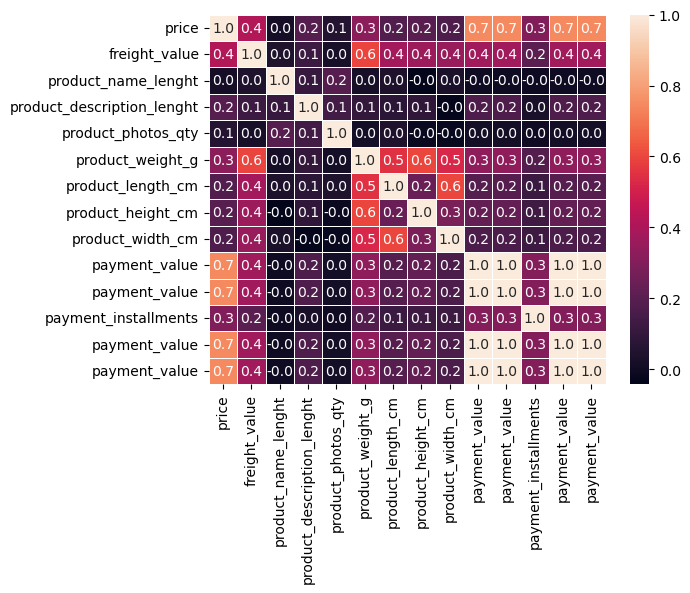

In [54]:
import seaborn as sn

correlation = df_num.corr()

plot=sn.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)

Transformando em dummies

In [55]:
DataMatrix = pd.get_dummies(df_features, drop_first=True)

Treino vs Test

In [74]:
treino, teste = train_test_split(DataMatrix, test_size=0.3, random_state=42)

In [77]:
treino.shape

(8104, 82)

In [78]:
teste.shape

(3474, 82)

StandScaler

In [75]:
X = StandardScaler().fit_transform(treino)

In [76]:
X.shape

(8104, 82)

PCA

In [91]:
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]

df = pd.DataFrame(X, columns=col_name)

pca = PCA(n_components=0.85, svd_solver='full')
pca_array = pca.fit_transform(df)
df_pca = pd.DataFrame(data=pca_array)

# Renomear as colunas do DataFrame df_pca
df_pca_columns = ['PC' + str(col + 1) for col in range(df_pca.shape[1])]
df_pca.columns = df_pca_columns


<function matplotlib.pyplot.show(close=None, block=None)>

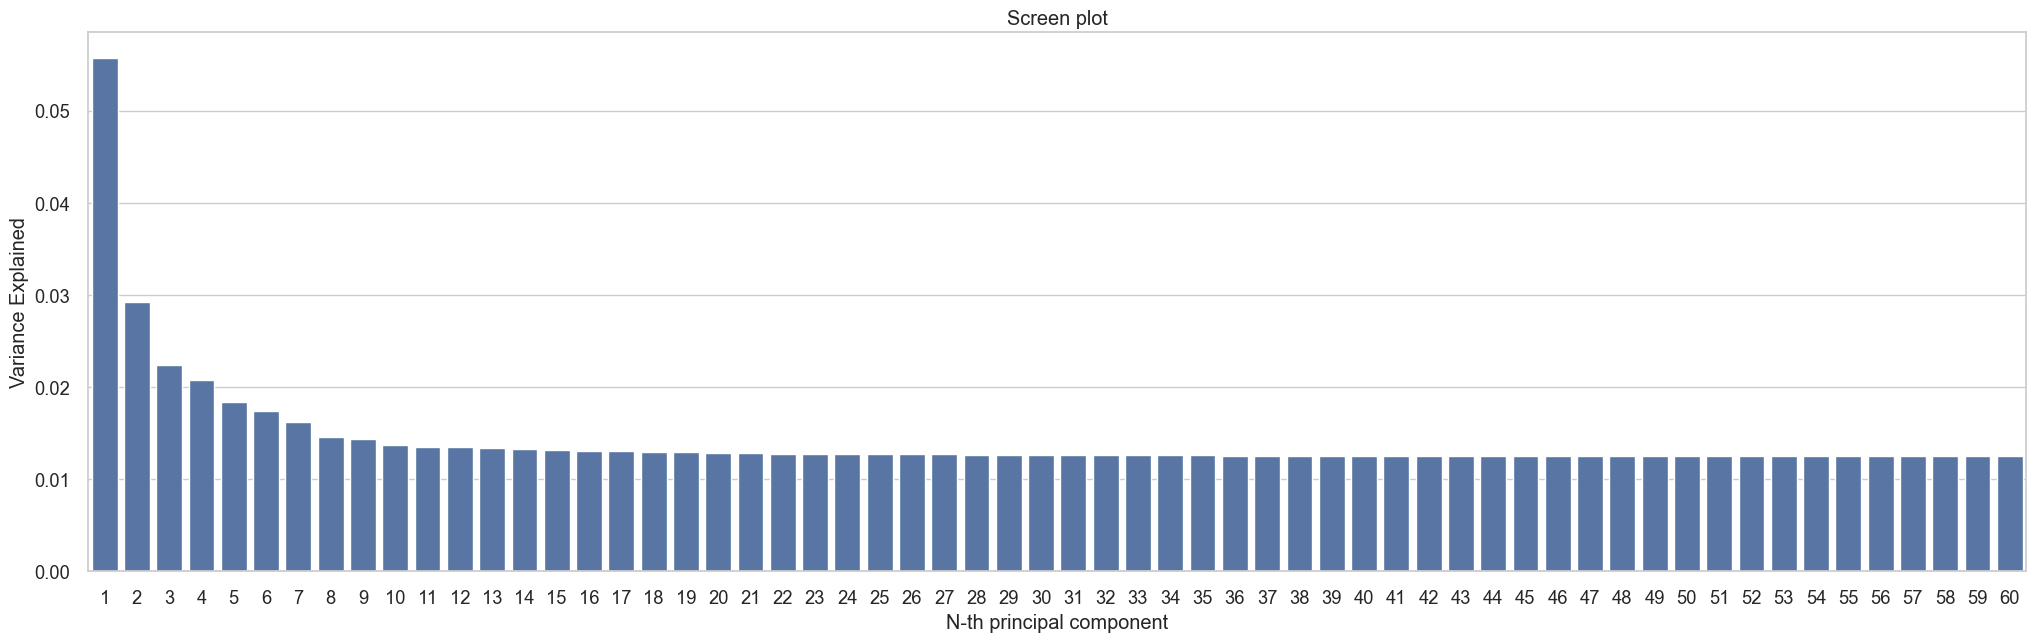

In [92]:
PC_components = np.arange(pca.n_components_) + 1

_= sns.set (style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(25,7))
_= sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')


plt.title('Screen plot')
plt.xlabel('N-th principal component')
plt.ylabel('Variance Explained')

plt.show

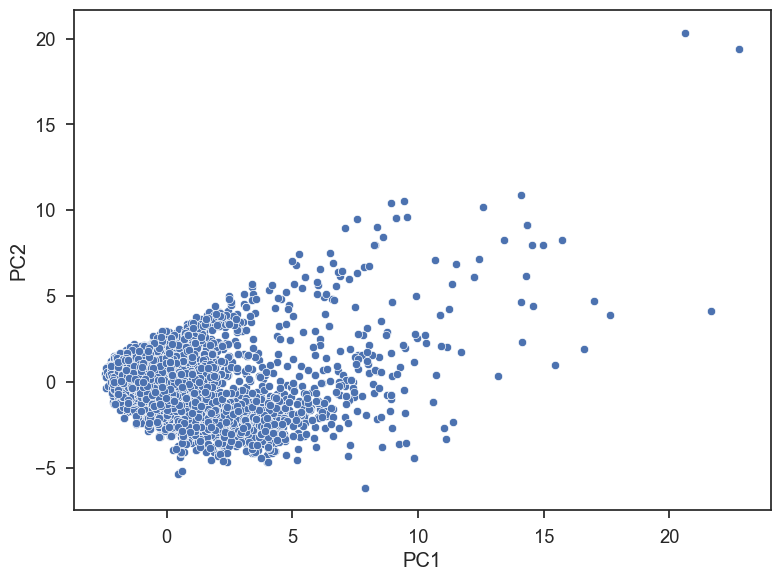

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(9, 6.5))
_= sns.scatterplot(data=df_pca, x='PC1', y='PC2')


In [94]:
import plotly.express as px

# Criar o gráfico 3D
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', 
                     title='Visualização dos 3 principais componentes',
                     labels={'PC1': 'Componente Principal 1', 
                             'PC2': 'Componente Principal 2', 
                             'PC3': 'Componente Principal 3'})

# Exibir o gráfico
fig.show()


In [96]:
autovetores = pca.components_

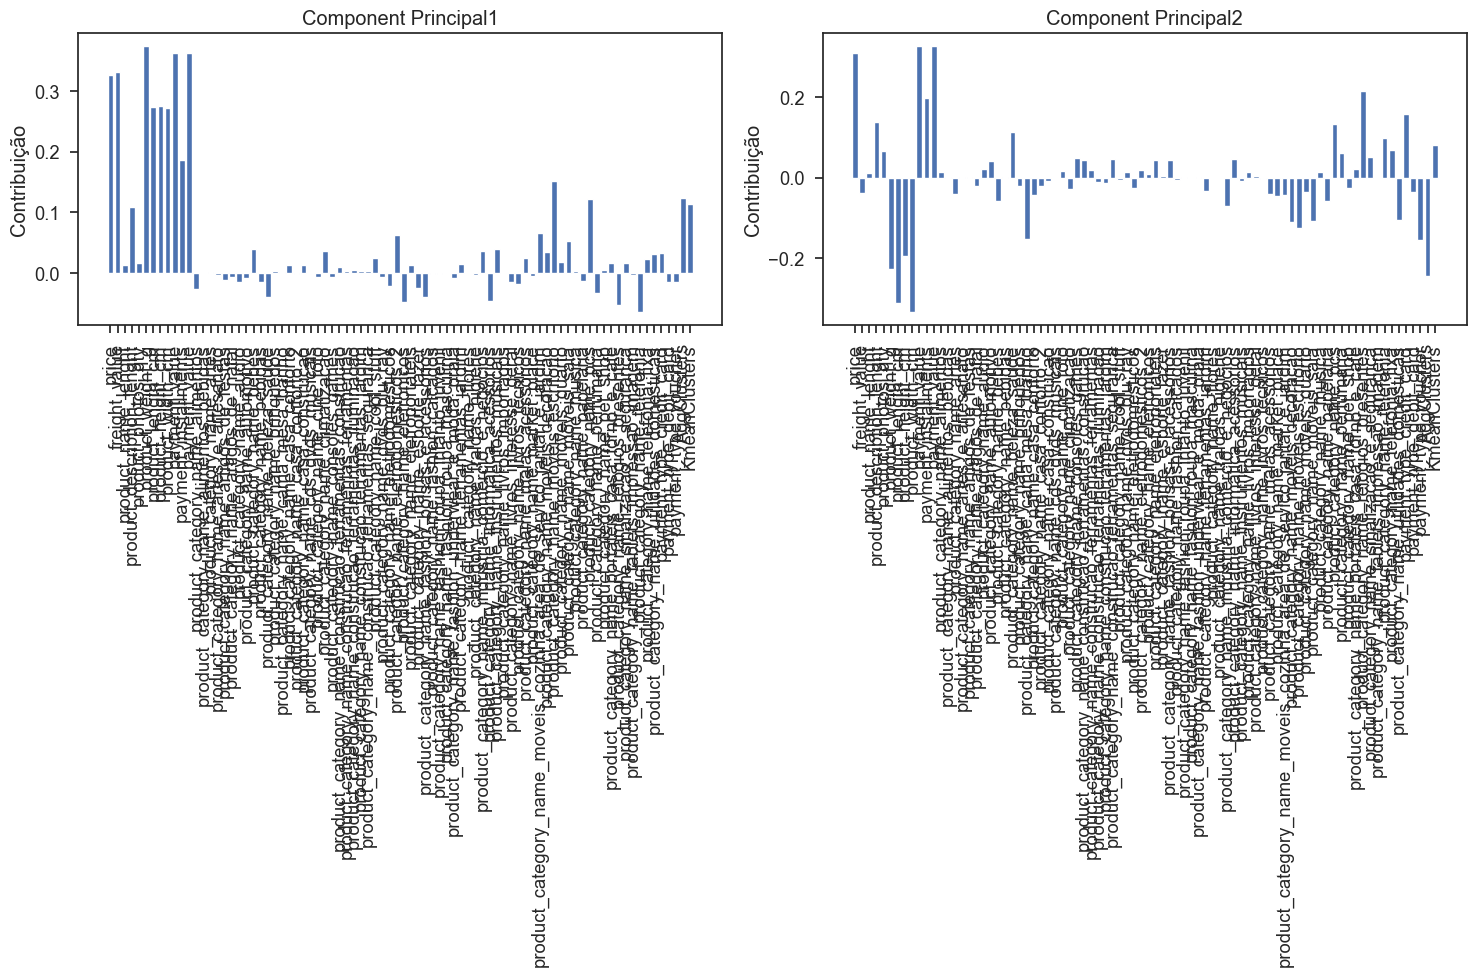

In [100]:
autovetores = pca.components_

plt.figure(figsize=(15,10))
for i, (var_contributions, component) in enumerate(zip(pca.components_[:2], range(len(autovetores[:2])))):
    plt.subplot(1,2, component + 1)
    plt.bar(range(len(treino.columns)), var_contributions)
    plt.title('Component Principal{}'.format(component + 1))
    plt.xticks(range(len(treino.columns)), treino.columns, rotation=90)
    plt.ylabel('Contribuição')
plt.tight_layout()
plt.show()

In [103]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

def find_optimal_cluster_number_kmeans(data, lower_bound, upper_bound, random_state):
    """
    Encontre o número ideal de clusters de acordo com o índice de silhueta.
    
    Parâmetros:
        - data: os dados que serão agrupados
        - lower_bound: número mínimo de clusters a serem testados
        - upper_bound: número máximo de clusters a serem testados
        - random_state: estado aleatório para reprodução dos resultados
        
    Retorna:
        - O número ótimo de clusters e a média do índice de silhueta para esse número de clusters.
    """
    silhouette_average = []
    K = range(lower_bound, upper_bound)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_score = metrics.silhouette_score(data, cluster_labels)
        silhouette_average.append([k, silhouette_score])
    silhouette_average = np.array(silhouette_average)
    optimal_cluster = int(silhouette_average[np.argmax(silhouette_average[:, 1]), 0])
    optimal_silhouette_score = silhouette_average[np.argmax(silhouette_average[:, 1]), 1]
    print("Número ótimo de clusters:", optimal_cluster)
    print("A média do silhouette score é:", optimal_silhouette_score)




In [104]:
# Exemplo de uso da função
data_array = np.random.rand(100, 2)  # Dados de exemplo
find_optimal_cluster_number_kmeans(data_array, 2, 20, random_state=123)

Número ótimo de clusters: 18
A média do silhouette score é: 0.44241706647580586


In [105]:
find_optimal_cluster_number_kmeans(pca_array, 2, 20, random_state=123)

Número ótimo de clusters: 2
A média do silhouette score é: 0.2989014000231354


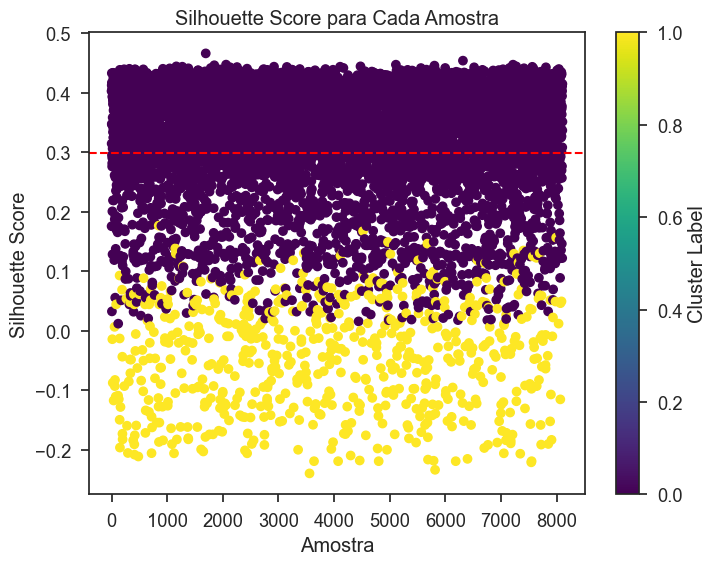

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Definir o número ótimo de clusters
n_clusters = 2  # Substitua pelo número ótimo de clusters determinado anteriormente

# Instanciar e treinar o modelo KMeans com o número ótimo de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
cluster_labels = kmeans.fit_predict(pca_array)

# Calcular o silhouette score para cada amostra
silhouette_scores = silhouette_samples(pca_array, cluster_labels)

# Plotar o silhouette score para cada amostra
plt.figure(figsize=(8, 6))
plt.scatter(range(len(pca_array)), silhouette_scores, c=cluster_labels, cmap='viridis')
plt.axhline(y=np.mean(silhouette_scores), color='red', linestyle='--')
plt.title('Silhouette Score para Cada Amostra')
plt.xlabel('Amostra')
plt.ylabel('Silhouette Score')
plt.colorbar(label='Cluster Label')
plt.show()


In [111]:
import plotly.graph_objects as go

# Criando o gráfico 3D
fig = go.Figure(data=[go.Scatter3d(
    x=pca_array[:, 0],
    y=pca_array[:, 1],
    z=pca_array[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    ),
    text=[f'Silhouette Score: {score:.2f}' for score in silhouette_scores],
    hoverinfo='text'
)])

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        hovermode='closest'
    ),
    title='Clusters em 3D com Silhouette Score',
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


PCA

In [61]:
# lets build elbow method to find the optimal number of clusters
pca = PCA(n_components=3)
pca.fit(DataMatrix)
PCA_ds = pd.DataFrame(pca.transform(DataMatrix), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,11578.0,-6.387987e-13,3763.594557,-2126.663764,-1836.360111,-1465.072415,-340.861136,28047.579085
col2,11578.0,-2.707157e-14,649.042718,-1139.071765,-449.074325,-172.206790,213.830520,3287.491406
col3,11578.0,-5.183562e-14,421.645173,-1133.351880,-150.968081,-60.947249,54.733095,9771.675312


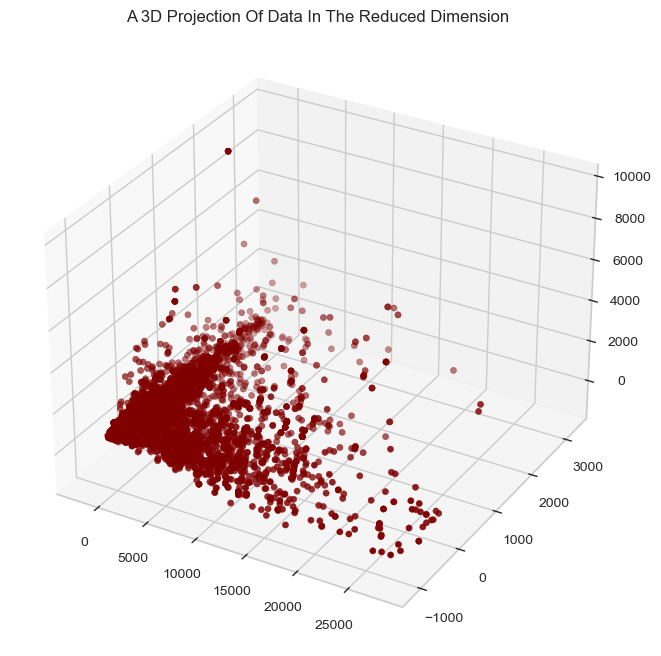

In [62]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


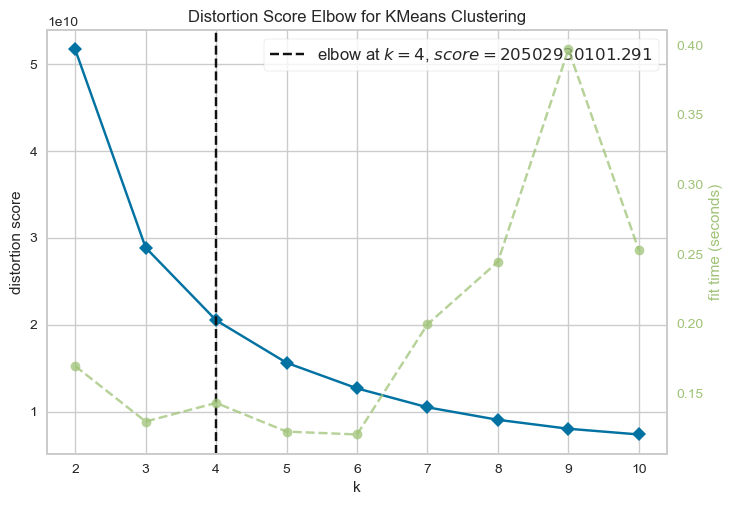

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(DataMatrix)
Elbow_M.show()

In [65]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(DataMatrix)
PCA_ds["AggClusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
DataMatrix["AggClusters"]= yhat_AC

In [67]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(DataMatrix, yhat_AC)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7019080627805643


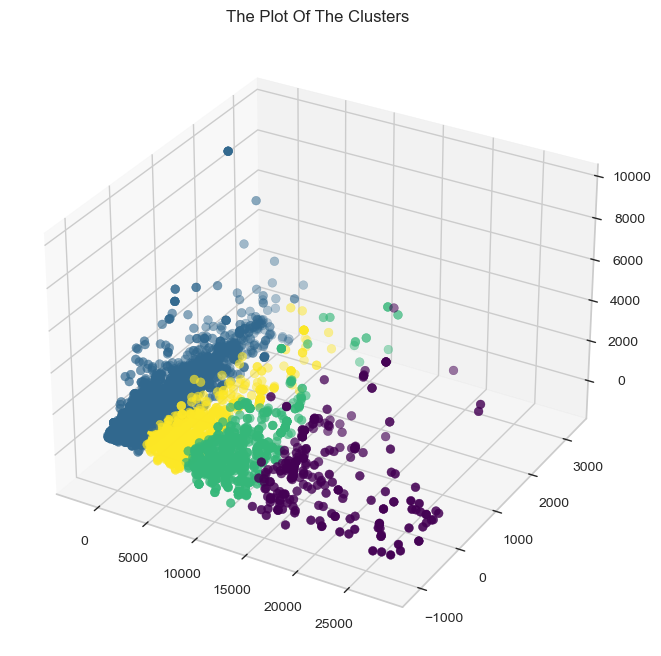

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Certifique-se de importar o módulo cmap
import matplotlib.cm as cm

# Se 'PCA_ds["AggClusters"]' for um array de números inteiros representando os rótulos de cluster
cmap = cm.get_cmap('viridis', len(set(PCA_ds["AggClusters"])))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["AggClusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

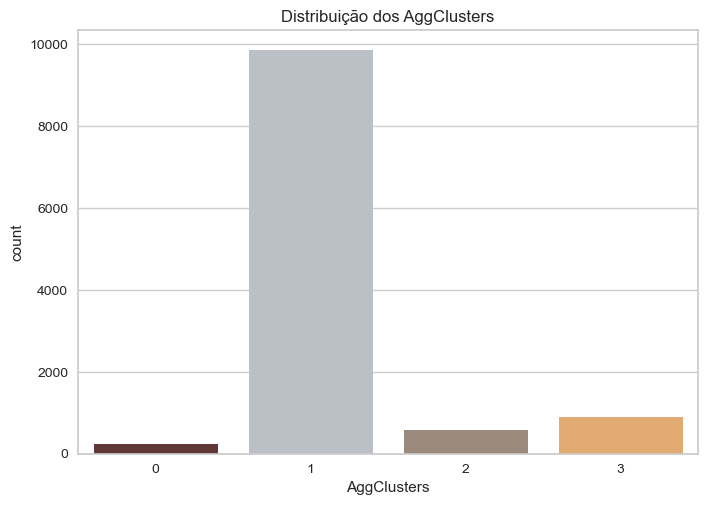

In [69]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=DataMatrix["AggClusters"], palette= pal)
pl.set_title("Distribuição dos AggClusters")
plt.show()

In [70]:
from sklearn.cluster import *
kmeans = KMeans(n_clusters=4)
yhat_kmeans = kmeans.fit_predict(PCA_ds)
PCA_ds["KmeanClusters"] = yhat_kmeans
DataMatrix["KmeanClusters"]= yhat_kmeans

In [71]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(DataMatrix, yhat_kmeans)

print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.7166956793377817


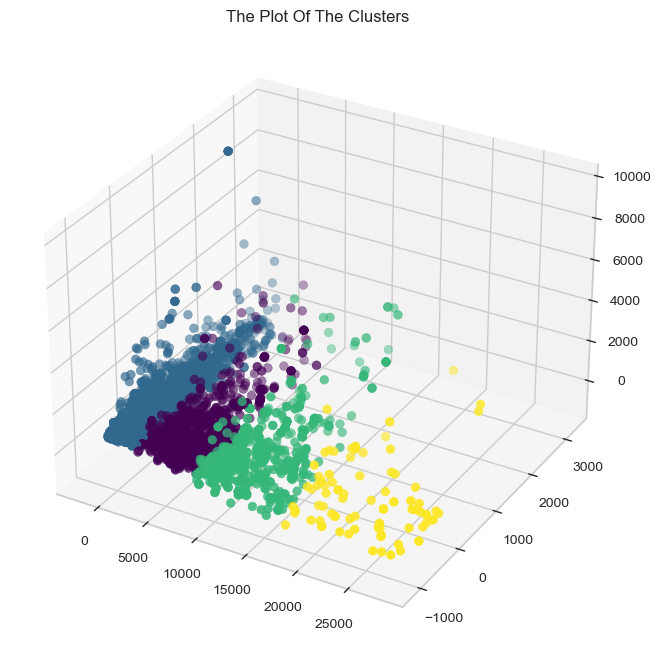

In [72]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["KmeanClusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

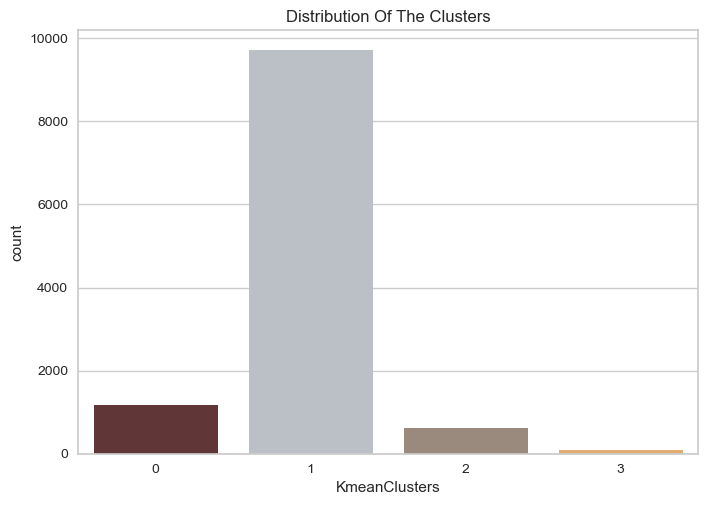

In [73]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=DataMatrix["KmeanClusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()